### Creating a Machine Learning model to determine the quality of the wine

*Objective : Building a machine learning model to predict the color of red and white wines * 

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Reading the white and red wine datasets

In [2]:
data_dir = "data"
white_wine_data_dir = f"{data_dir}/white.csv"
red_wine_data_dir = f"{data_dir}/red.csv"


df_white_wine = pd.read_csv(white_wine_data_dir, sep=';')
df_red_wine = pd.read_csv(red_wine_data_dir, sep=';')

Adding a **color** column to each dataset

In [3]:
df_white_wine['color'] = 'white'
df_red_wine['color'] = 'red'

In [4]:
df_white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [5]:
df_white_wine.shape

(4898, 13)

In [6]:
df_red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [7]:
df_red_wine.shape

(1599, 13)

*We will concatenate the dataframes of white and red wines*

In [8]:
df_wine = pd.concat([df_white_wine, df_red_wine])

In [9]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [10]:
df_wine.shape

(6497, 13)

#### Description of the dataset

In [11]:
df_wine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


#### Retrieving information about the dataset

In [12]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


The dataframe has 6497 rows and 13 columns

#### Unique colors in the dataset

In [13]:
df_wine['color'].unique()

array(['white', 'red'], dtype=object)

Value count for feature color
white    4898
red      1599
Name: color, dtype: int64


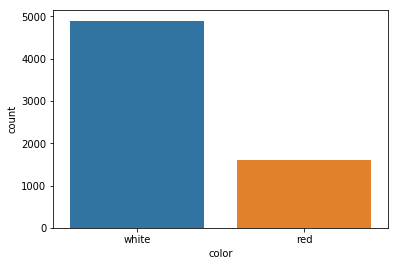

In [14]:
print("Value count for feature color")
print(df_wine['color'].value_counts())
sns.countplot('color', data=df_wine)

Pie chart showing **wine color** distribution

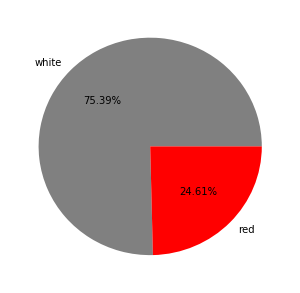

In [15]:
plt.figure(figsize=(5,5))
plt.pie(df_wine['color'].value_counts(), labels=df_wine['color'].unique(), autopct='%0.2f%%', colors = ['grey', 'red'])
plt.show()

The data is imbalanced and unevenly distributed. There are much more records for **white** wines than for **red** wines

Analysing the **quality** column

In [16]:
df_wine['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

Value count for feature color
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


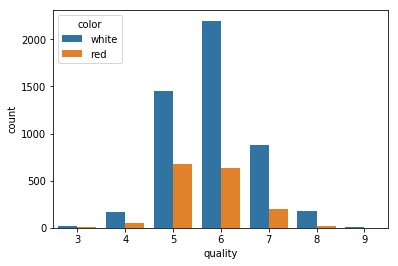

In [17]:
print("Value count for feature color")
print(df_wine['quality'].value_counts())
sns.countplot('quality', data=df_wine, hue='color')

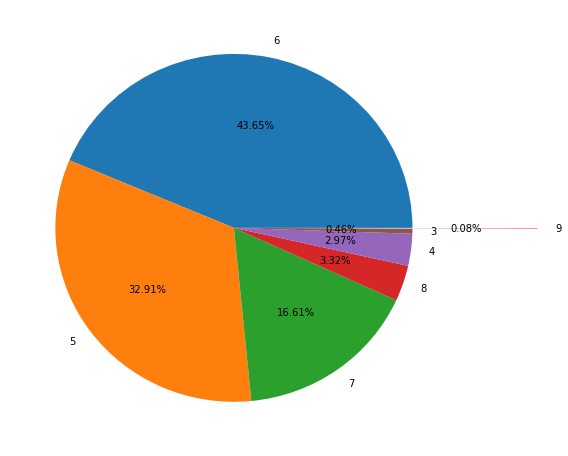

In [18]:
plt.figure(figsize=(8,8))
plt.pie(df_wine['quality'].value_counts(), labels=df_wine['quality'].unique(), autopct='%0.2f%%', explode=(0,0,0,0,0,0,0.7))
plt.show()

Wines with **quality** as 6 are the maximum in number whereas wines with **quality** as **3**, **4**, and **9** are very minimal

Extracting the continuous features from the data

In [19]:
continuous_features = [feature for feature in df_wine.select_dtypes(np.number).columns if feature not in ['quality', 'color']]

In [20]:
continuous_features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

## Plotting Boxplots to identify Univariate outliers

In [21]:
def create_boxplots(dataset, feature_list):
    for feature in feature_list:
        plt.figure(figsize=(10,10))
        plt.subplot(2,2,1)
        dataset.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.subplot(2,2,2)
        sns.boxplot(x=dataset['color'], y=dataset[feature], data=dataset, hue='color', color='orange')
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

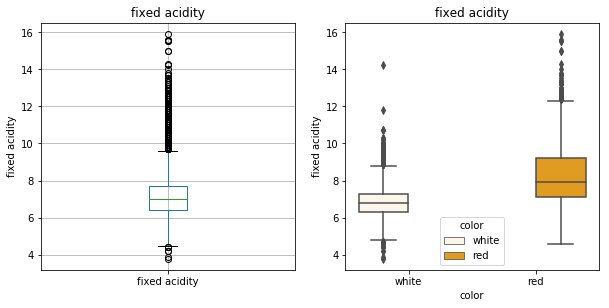

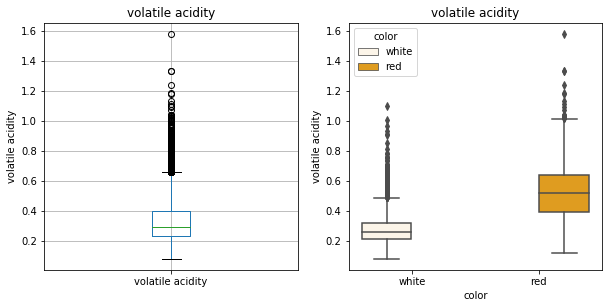

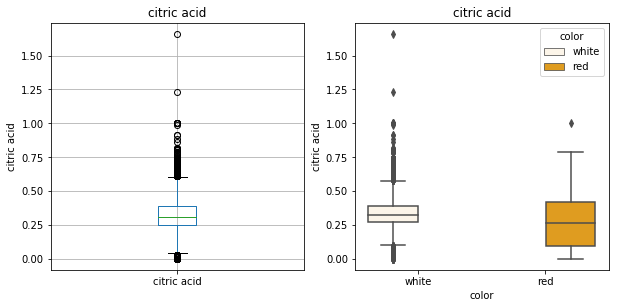

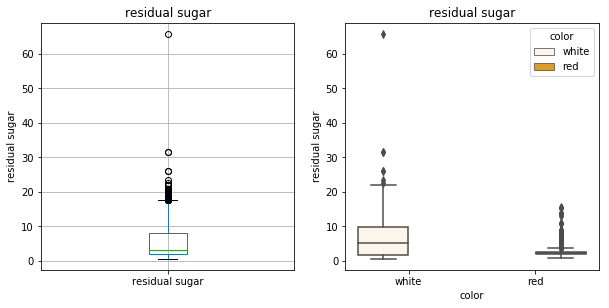

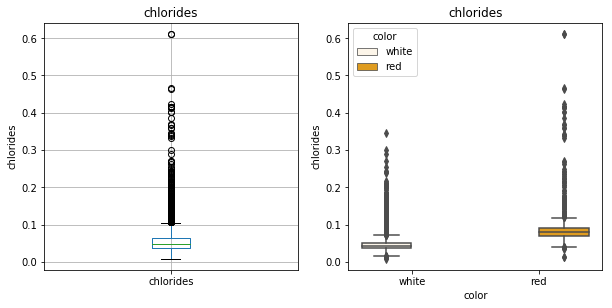

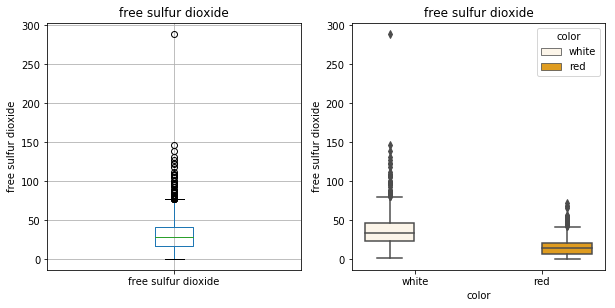

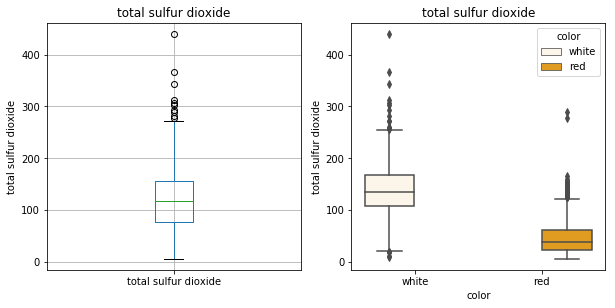

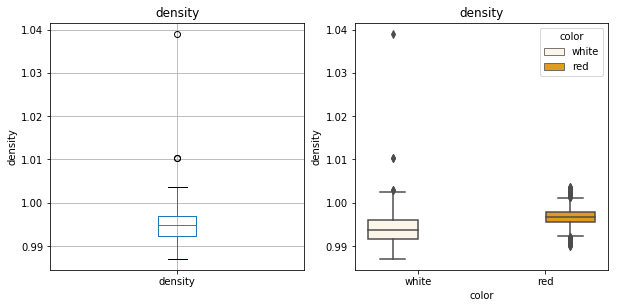

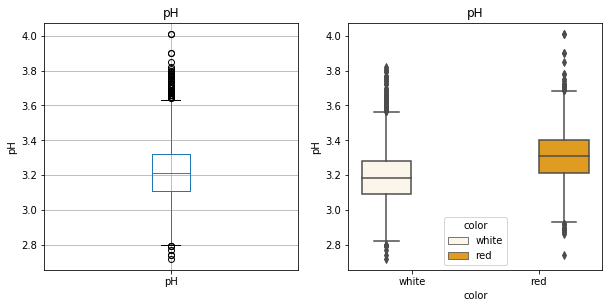

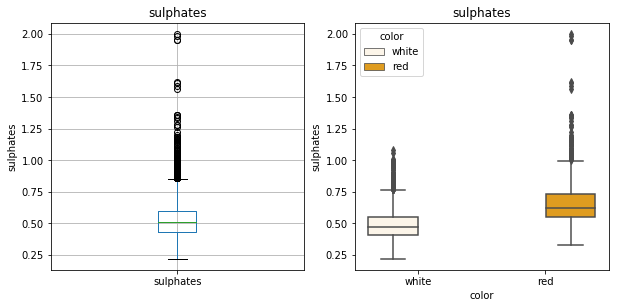

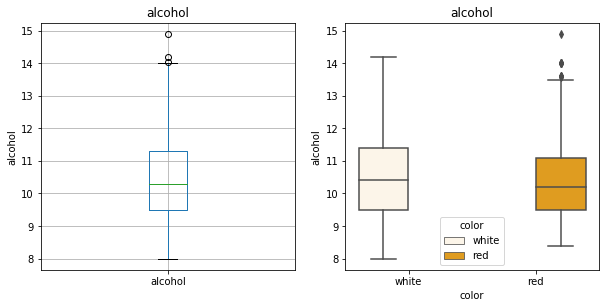

In [22]:
create_boxplots(df_wine, continuous_features)

From the boxplots, it can be observed that all the continuous features have univariate outliers

## Plotting histograms and distplots to check the distributions of continuous variables

In [23]:
def create_histograms_distplots(dataset, feature_list):
    for feature in feature_list:
        plt.figure(figsize=(8,8))
        plt.subplot(2,2,1)
        plt.hist(dataset[feature].dropna())
        plt.xlabel(feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.subplot(2,2,2)
        sns.distplot(dataset[feature])
        plt.xlabel(feature)
        plt.show()

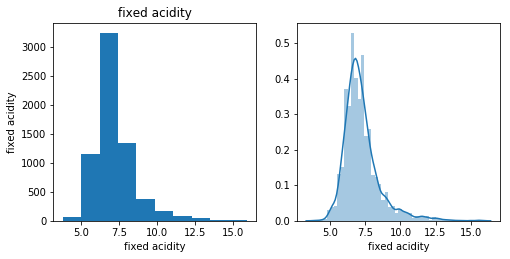

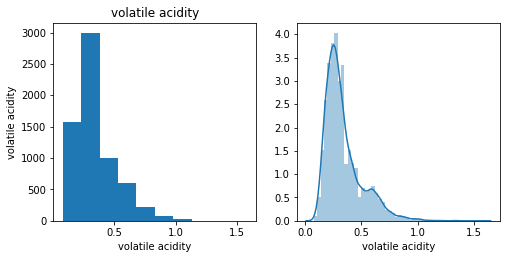

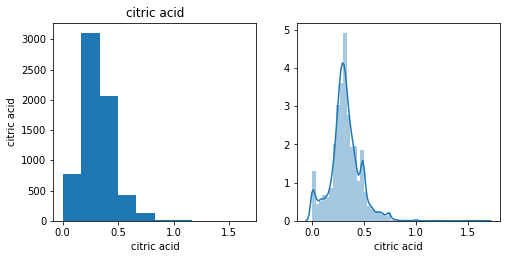

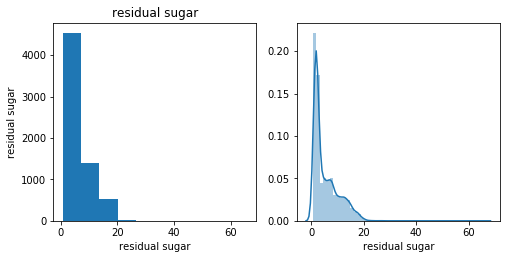

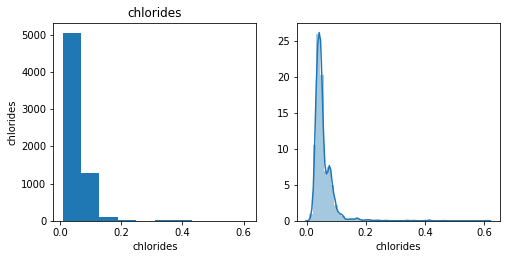

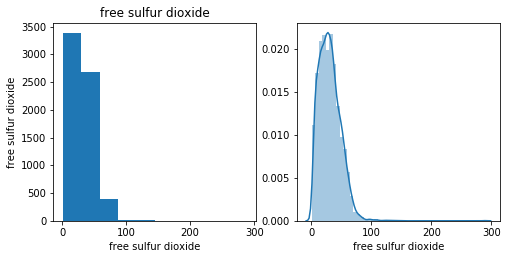

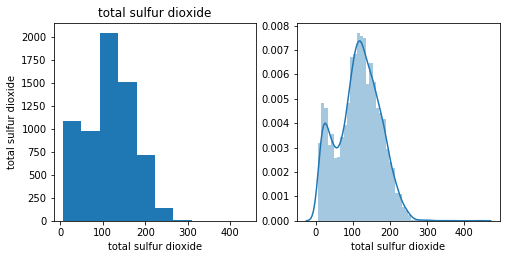

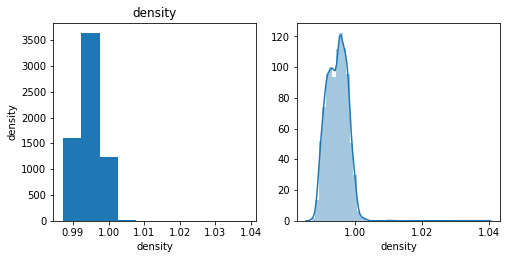

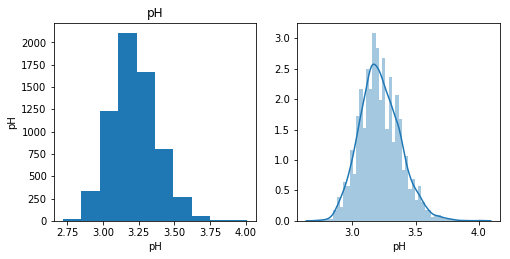

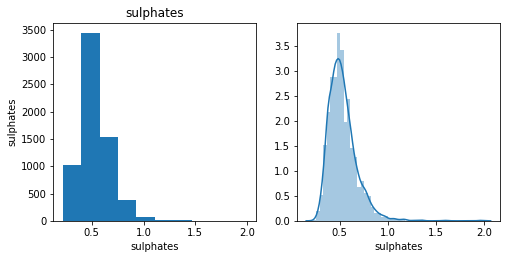

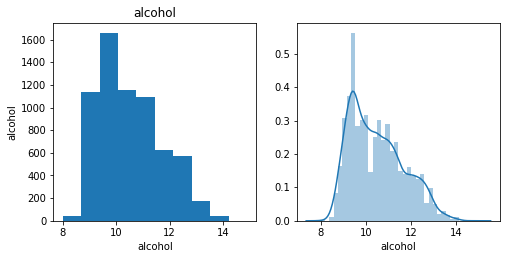

In [24]:
create_histograms_distplots(df_wine, continuous_features)

Except for **pH**, all other continuous variables are skewed

## Plotting a Heatmap for correlation analysis

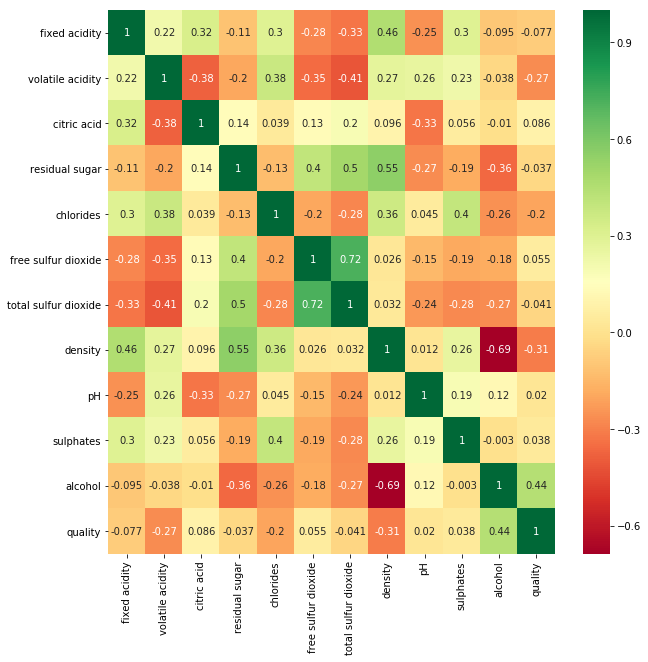

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(df_wine.corr(), annot=True, cmap="RdYlGn")

The correlation analysis using heatmap shows values of pearson correlation coefficient for the respective combinations of the features. The pearson correlation coefficient varies from -1 to 1. The stronger the negative value, the more inversely related are the features. The stronger the positive value, the stronger the direct relationship between the features. A value of zero means the features are independent of each other.

The correlation analysis will have effect on the feature selection. The combination of features which are strongly and directly related to each other need to be considered. One of such features can be dropped as all of such features will have the same impact on the target feature.

## Plotting Hexplot to check the concentration of data points

In [26]:
def create_jointplots(dataset, feature_list):
    plt.figure(figsize=(7,7))
    for feature in feature_list:
        for bivariate_feature in feature_list:
            if feature != bivariate_feature:
                sns.jointplot(x=feature, y=bivariate_feature, data=dataset, kind='hex')

In [27]:
#create_jointplots(df_wine, continuous_features)

## Plotting FacetGrids

In [28]:
def create_FacetGrid(dataset, feature_list):
    for feature in feature_list:
        v = sns.FacetGrid(dataset, col='color', row='quality')
        v.map(plt.hist, feature)

In [29]:
#create_FacetGrid(df_wine, continuous_features)

## Creating Pivot table

In [30]:
pd.pivot_table(df_wine, index='color', values=continuous_features, aggfunc=['median'])

median                                               \
      alcohol chlorides citric acid  density fixed acidity   
color                                                        
red      10.2     0.079        0.26  0.99675           7.9   
white    10.4     0.043        0.32  0.99374           6.8   

                                                                               \
      free sulfur dioxide    pH residual sugar sulphates total sulfur dioxide   
color                                                                           
red                  14.0  3.31            2.2      0.62                 38.0   
white                34.0  3.18            5.2      0.47                134.0   

                        
      volatile acidity  
color                   
red               0.52  
white             0.26

It can be observed that **white** wine has a much higher median concentration of **free sulfur dioxide** and **total sulfur dioxide than **red** wine

In [31]:
pd.pivot_table(df_wine, index='quality', values=continuous_features, aggfunc='median')

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,
3,10.15,0.0550,0.33,0.995900,7.45,17.0,3.245,3.15,0.505,102.5,0.415
4,10.00,0.0505,0.26,0.994995,7.00,15.0,3.220,2.20,0.485,102.0,0.380
5,9.60,0.0530,0.30,0.996100,7.10,27.0,3.190,3.00,0.500,127.0,0.330
6,10.50,0.0460,0.31,0.994700,6.90,29.0,3.210,3.10,0.510,117.0,0.270
7,11.40,0.0390,0.32,0.992400,6.90,30.0,3.220,2.80,0.520,114.0,0.270
8,12.00,0.0370,0.32,0.991890,6.80,34.0,3.230,4.10,0.480,118.0,0.280
9,12.50,0.0310,0.36,0.990300,7.10,28.0,3.280,2.20,0.460,119.0,0.270


The above pivot table shows the concentration of various constituents in wines of respective quality values

In [32]:
df_wine.groupby(['quality', 'color'])[['color']].count().sort_values(['quality']).rename(columns={'color':'Count'})

Count
quality color       
3       red       10
        white     20
4       red       53
        white    163
5       red      681
        white   1457
6       red      638
        white   2198
7       red      199
        white    880
8       red       18
        white    175
9       white      5

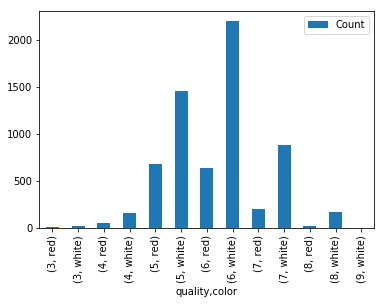

In [33]:
df_wine.groupby(['quality', 'color'])[['color']].count().sort_values(['quality']).rename(columns={'color':'Count'}).plot(kind='bar')

The **white** wine with wuality **6** is the maximum in count wherea the **white** wines with quality **9** is minimum in count

During the training phase, the ML model should know only about the training data. But if the model gets to know about the test data during the training phase, then this is called data leakage.

So we should perform splitting of the dataset before applying feature engineering. After splitting, we will first apply feature engineering for the training data and then apply it on to the test data. This will help to reduce data leakage and overfitting.

But presence of duplicates can also cause data leakage. Therefore, we will first remove the duplicate records from the dataset and then perform train test split

#### Identifying and removing duplicate rows in the dataset

In [34]:
df_wine.duplicated().sum()

1177

It can be observed that there **1177** duplicates in the datafram

In [35]:
#Removing the duplicates but retaining only the first instance of the duplicate row
df_wine = df_wine.drop_duplicates(keep='first')

In [36]:
df_wine.duplicated().sum()

0

The duplicate records have been removed

The indices of the dataframe will have to be reset from train test split

In [37]:
df_wine.reset_index(inplace = True, drop = True)

#### Splitting the dataset into training and testing datasets

In [38]:
X = df_wine.drop(columns=["color"], axis=1)
Y = df_wine.color

In [39]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, shuffle=True)
'''
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.3, random_state = 42)
for train_index, test_index in split.split(df3, df3['color_white']):
    strat_train_set = df3.loc[train_index]
    strat_test_set = df3.loc[test_index]
    '''

"\nsplit = StratifiedShuffleSplit(n_splits=1, test_size = 0.3, random_state = 42)\nfor train_index, test_index in split.split(df3, df3['color_white']):\n    strat_train_set = df3.loc[train_index]\n    strat_test_set = df3.loc[test_index]\n    "

In [40]:
X_train.shape

(3724, 12)

In [41]:
X_test.shape

(1596, 12)

In [42]:
y_train.shape

(3724,)

In [43]:
y_test.shape

(1596,)

Joining the training dataframe

In [44]:
df_train = X_train.join(y_train, how='inner')

Joining the testing dataframe

In [45]:
df_test = X_test.join(y_test, how='inner')

Resetting the indices for the training and test dataframes

In [46]:
df_train.reset_index(inplace = True, drop = True)

In [47]:
df_test.reset_index(inplace = True, drop = True)

## Data Preprocessing and cleaning

#### Checking if there is any missing value in the dataset

In [48]:
df_train.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

*We observe there are no missing values in the dataset*

#### Defining function to create boxplots and distplots

In [49]:
def remove_outliers(dataset, list_of_features):
    for feature in list_of_features:
        IQR = dataset[feature].quantile(0.75)-dataset[feature].quantile(0.25)
        lower_bridge = dataset[feature].quantile(0.25) - IQR*(1.5)
        upper_bridge = dataset[feature].quantile(0.75) + IQR*(1.5)
        dataset.loc[dataset[feature] >= upper_bridge, feature] = upper_bridge
        dataset.loc[dataset[feature] <= lower_bridge, feature] = lower_bridge

In [50]:
remove_outliers(df_train, continuous_features)

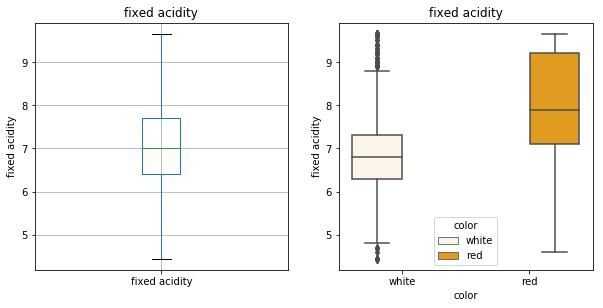

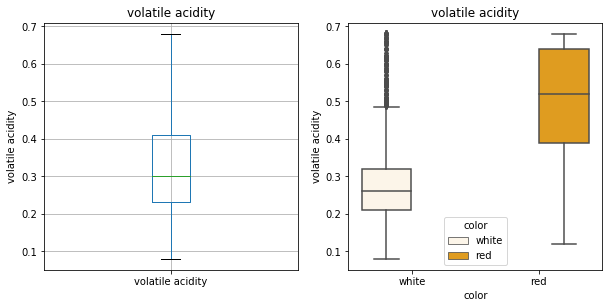

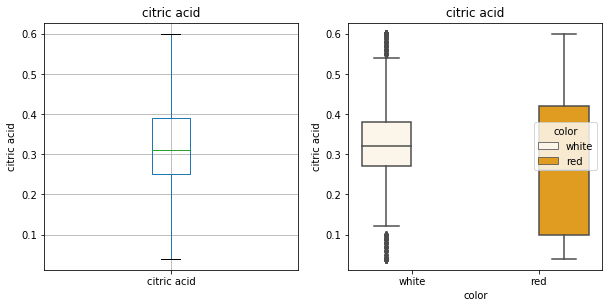

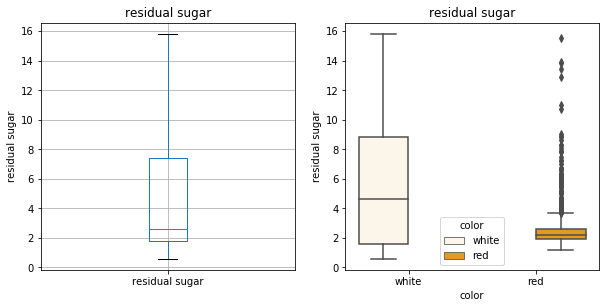

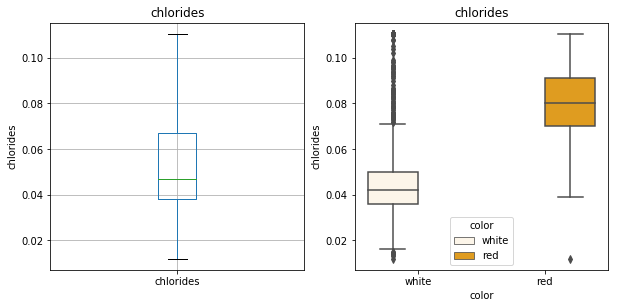

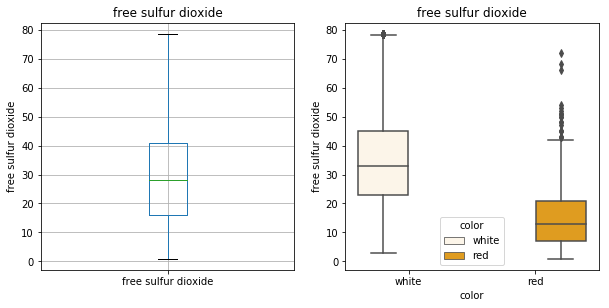

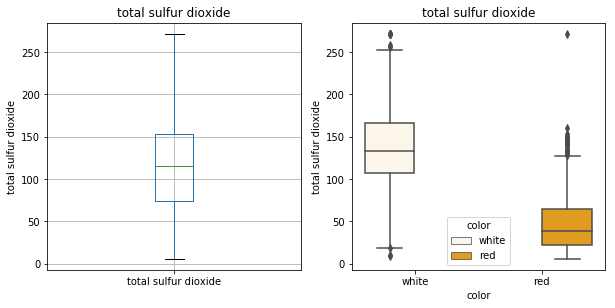

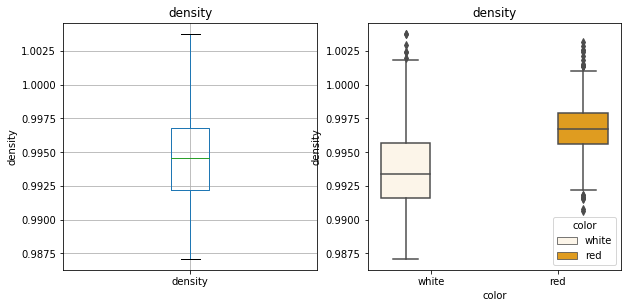

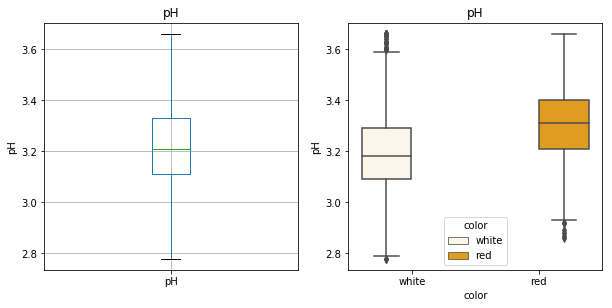

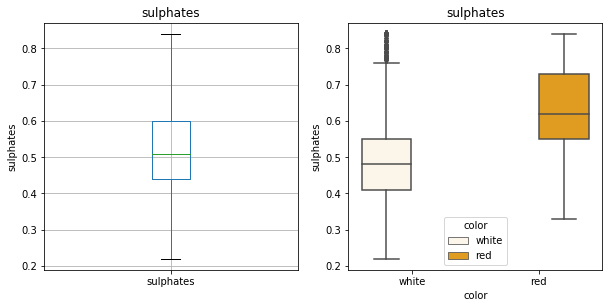

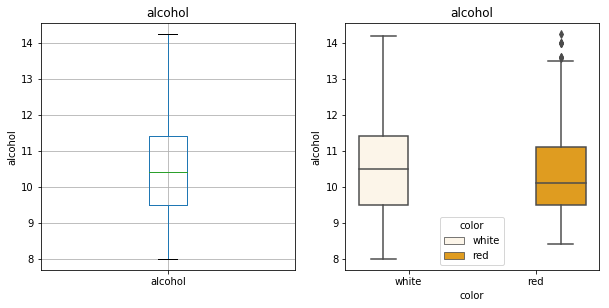

In [51]:
create_boxplots(df_train, continuous_features)

We can see from the boxplots that there are outliers. So we need to to handle these outliers.

## Plotting scatterplot to identify any multivariate outliers

In [52]:
def create_scatterplots(dataset, feature_list):
    for feature in feature_list:
        for bivariate_feature in feature_list:
            if feature != bivariate_feature:
                sns.lmplot(feature, bivariate_feature, data=dataset, fit_reg=False, hue='color')

In [53]:
#create_scatterplots(df_train, continuous_features)

In [54]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] < 5.5) & (df_train['residual sugar'] > 15)].index)

In [55]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] < 5) & (df_train['free sulfur dioxide'] > 75)].index)

In [56]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] > 9) & (df_train['free sulfur dioxide'] > 75)].index)

In [57]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] > 9) & (df_train['alcohol'] > 14)].index)

In [58]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] < 5) & (df_train['alcohol'] < 9)].index)

In [59]:
df_train = df_train.drop(df_train[(df_train['volatile acidity'] > 0.6) & (df_train['residual sugar'] > 15)].index)

In [60]:
df_train = df_train.drop(df_train[(df_train['volatile acidity'] > 0.55) & (df_train['chlorides'] < 0.025)].index)

In [61]:
df_train = df_train.drop(df_train[(df_train['volatile acidity'] > 0.6) & (df_train['free sulfur dioxide'] > 60)].index)

In [62]:
df_train = df_train.drop(df_train[(df_train['volatile acidity'] > 0.45) & (df_train['pH'] < 2.8)].index)

In [63]:
df_train = df_train.drop(df_train[(df_train['volatile acidity'] > 0.65) & (df_train['sulphates'] < 0.3)].index)

In [64]:
df_train = df_train.drop(df_train[(df_train['volatile acidity'] > 0.65) & (df_train['sulphates'] < 0.3)].index)

In [65]:
df_train = df_train.drop(df_train[(df_train['citric acid'] < 0.2) & (df_train['density'] < 0.9890)].index)

In [66]:
df_train = df_train.drop(df_train[(df_train['citric acid'] > 0.4) & (df_train['alcohol'] > 13.5)].index)

In [67]:
df_train = df_train.drop(df_train[(df_train['residual sugar'] > 11) & (df_train['fixed acidity'] < 4.5)].index)

In [68]:
df_train = df_train.drop(df_train[(df_train['residual sugar'] > 15) & (df_train['chlorides'] > 0.1)].index)

In [69]:
df_train = df_train.drop(df_train[(df_train['residual sugar'] > 15) & (df_train['free sulfur dioxide'] > 75)].index)

In [70]:
df_train = df_train.drop(df_train[(df_train['residual sugar'] > 15) & (df_train['total sulfur dioxide'] < 50)].index)

In [71]:
df_train = df_train.drop(df_train[(df_train['density'] > 1) & (df_train['residual sugar'] > 10) & (df_train['residual sugar'] < 14)].index)

In [72]:
df_train = df_train.drop(df_train[(df_train['pH'] < 2.8) & (df_train['residual sugar'] > 14)].index)

In [73]:
df_train = df_train.drop(df_train[(df_train['alcohol'] > 13.5) & (df_train['residual sugar'] > 8) & (df_train['residual sugar'] < 12)].index)

In [74]:
df_train = df_train.drop(df_train[(df_train['chlorides'] < 0.04) & (df_train['density'] > 1.0025)].index)

The multivariate outliers have been removed

#### Checking for skewness

**Skewness scores to determine skewness in the column**

In [75]:
from scipy.stats import skew

In [76]:
def skewness_score(dataset, feature_list):
    for feature in feature_list:
        print(feature,'skewness score :', skew(dataset[feature]))
        print()

In [77]:
skewness_score(df_train, continuous_features)

fixed acidity skewness score : 0.6829215961620844

volatile acidity skewness score : 0.9265247283203022

citric acid skewness score : -0.01650078308542319

residual sugar skewness score : 1.1671828716324137

chlorides skewness score : 0.9700103813410973

free sulfur dioxide skewness score : 0.5516863547308051

total sulfur dioxide skewness score : 0.00522742604810469

density skewness score : 0.03196772734890552

pH skewness score : 0.2700310113757823

sulphates skewness score : 0.5590498875937295

alcohol skewness score : 0.5080525132010668



From the distplots, it can be observed that the feature columns **volatile acidity**, **residual sugar**, **free sulfur dioxide**, **sulphates**, **chlorides** and **alcohol** are considerably skewed. We will remove skewness by performing square root transformation

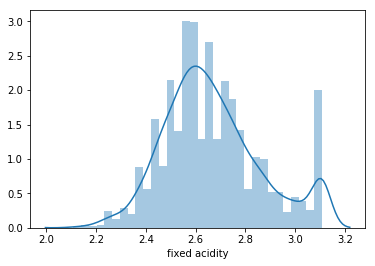

In [78]:
df_train['fixed acidity'] = np.sqrt(df_train['fixed acidity'])
sns.distplot(df_train['fixed acidity'])

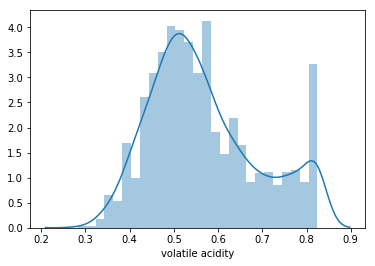

In [79]:
df_train['volatile acidity'] = np.sqrt(df_train['volatile acidity'])
sns.distplot(df_train['volatile acidity'])

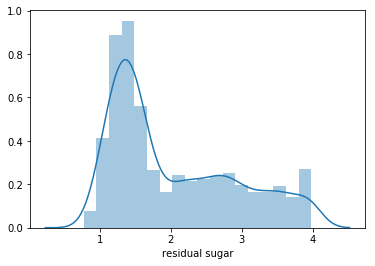

In [80]:
df_train['residual sugar'] = np.sqrt(df_train['residual sugar'])
sns.distplot(df_train['residual sugar'])

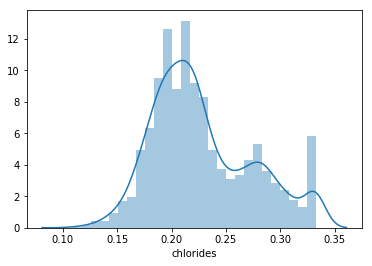

In [92]:
df_train['chlorides'] = np.sqrt(df_train['chlorides'])
sns.distplot(df_train['chlorides'])

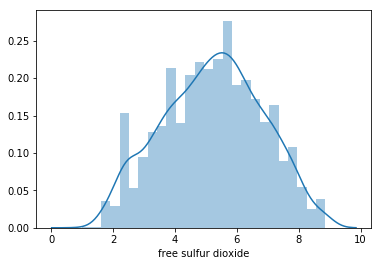

In [93]:
df_train['free sulfur dioxide'] = np.sqrt(df_train['free sulfur dioxide'])
sns.distplot(df_train['free sulfur dioxide'].dropna())

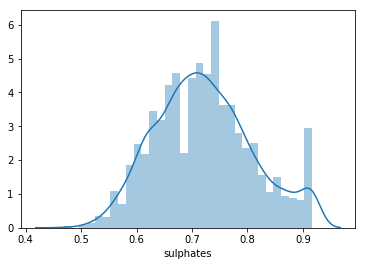

In [94]:
df_train['sulphates'] = np.sqrt(df_train['sulphates'])
sns.distplot(df_train['sulphates'].dropna())

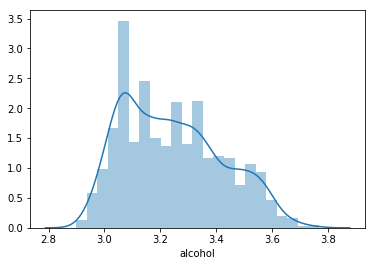

In [95]:
df_train['alcohol'] = np.sqrt(df_train['alcohol'])
sns.distplot(df_train['alcohol'].dropna())

The skewness has been handled

## Feature Selection

**Feature Selection** is performed to retain only the important features and discard the irrelevant features

In [96]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [97]:
X = df_train.iloc[:,:-1]

In [98]:
X.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.549510,0.529150,0.34,2.144761,0.232379,4.690416,130.0,0.99193,3.20,0.678233,3.464102,7
1,2.387467,0.519615,0.32,1.095445,0.214476,4.472136,155.0,0.99340,3.66,0.640312,3.193744,6


In [99]:
Y = df_train.iloc[:,-1]

In [100]:
Y.head(2)

0    white
1    white
Name: color, dtype: object

In [101]:
bestfeatures = SelectKBest(score_func = chi2)

In [102]:
fit = bestfeatures.fit(X, Y)

In [103]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [104]:
featureScores = pd.concat([dfcolumns, dfscores], axis=1)

In [105]:
featureScores.columns = ['Features', 'Score']

In [106]:
featureScores.sort_values(by='Score', ascending=False)

,Features,Score
6,total sulfur dioxide,50696.029813
5,free sulfur dioxide,511.362507
3,residual sugar,146.664807
1,volatile acidity,42.842742
4,chlorides,17.099797
0,fixed acidity,11.630497
9,sulphates,9.865425
2,citric acid,8.831248
11,quality,6.783412
8,pH,2.941579


## Feature Importance

In [107]:
from sklearn.ensemble import ExtraTreesClassifier

In [108]:
model = ExtraTreesClassifier()

In [109]:
model.fit(X,Y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [110]:
feat_importances = pd.Series(model.feature_importances_, index = X.columns)

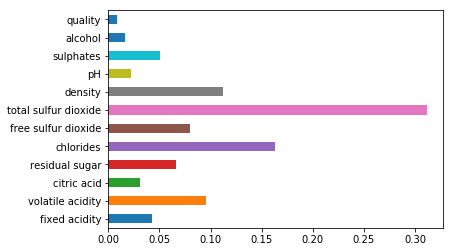

In [111]:
feat_importances.plot(kind='barh')
plt.show()

In [112]:
df_train = df_train.drop(['pH', 'alcohol', 'quality'], axis = 1)

In [113]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,color
0,2.549510,0.529150,0.34,2.144761,0.232379,4.690416,130.0,0.99193,0.678233,white
1,2.387467,0.519615,0.32,1.095445,0.214476,4.472136,155.0,0.99340,0.640312,white
2,2.569047,0.824621,0.04,2.792848,0.281069,2.449490,12.0,0.99630,0.707107,red
3,2.828427,0.787401,0.35,1.673320,0.293258,5.291503,52.0,0.99700,0.787401,red
4,2.720294,0.387298,0.42,1.303840,0.212132,7.000000,154.0,0.99200,0.774597,white


In [114]:
df_test = df_test.drop(['pH', 'alcohol', 'quality'], axis = 1)

In [115]:
df_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,color
0,9.4,0.420,0.32,6.5,0.027,20.0,167.0,0.99479,0.43,white
1,8.6,0.635,0.68,1.8,0.403,19.0,56.0,0.99632,1.15,red
2,5.7,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,0.44,white
3,8.0,0.570,0.23,3.2,0.073,17.0,119.0,0.99675,0.57,red
4,7.1,0.170,0.38,7.4,0.052,49.0,182.0,0.99580,0.52,white


In [116]:
df_train.to_csv('file1.csv')

In [117]:
df = pd.read_csv('file1.csv', index_col='Unnamed: 0')

## Handling imbalance in the data

In [118]:
from collections import Counter

In [119]:
print(df['color'].value_counts())

white    2743
red       950
Name: color, dtype: int64


In [5]:
from imblearn.combine import SMOTETomek

ModuleNotFoundError: No module named 'imblearn'

In [1]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.24.1.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



In [121]:
os = SMOTETomek(0.5)

NameError: name 'SMOTETomek' is not defined

In [122]:
X = df.iloc[:,:-1]

In [30]:
Y = df.iloc[:,-1]

In [32]:
X_train, Y_train = os.fit_resample(X, Y)

In [35]:
print("Number of classes after fit {}".format(Counter(Y_train)))

Number of classes after fit Counter({'white': 2701, 'red': 1329})


In [36]:
print("Number of classes before fit {}".format(Counter(Y)))

Number of classes before fit Counter({'white': 2743, 'red': 950})


In [37]:
df_train = X_train.join(Y_train, how='inner')

In [135]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,color
0,2.549510,0.529150,0.34,2.144761,0.232379,4.690416,130.0,0.99193,0.678233,white
1,2.387467,0.519615,0.32,1.095445,0.214476,4.472136,155.0,0.99340,0.640312,white
2,2.569047,0.824621,0.04,2.792848,0.281069,2.449490,12.0,0.99630,0.707107,red
3,2.828427,0.787401,0.35,1.673320,0.293258,5.291503,52.0,0.99700,0.787401,red
4,2.720294,0.387298,0.42,1.303840,0.212132,7.000000,154.0,0.99200,0.774597,white


In [39]:
df_train.to_csv('file2.csv')

In [123]:
df_train_balanced = pd.read_csv('file2.csv', index_col='Unnamed: 0')

In [124]:
df_train_balanced.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,color
0,2.549510,0.529150,0.34,2.144761,0.232379,4.690416,130.0,0.99193,0.678233,white
1,2.387467,0.519615,0.32,1.095445,0.214476,4.472136,155.0,0.99340,0.640312,white
2,2.569047,0.824621,0.04,2.792848,0.281069,2.449490,12.0,0.99630,0.707107,red
3,2.828427,0.787401,0.35,1.673320,0.293258,5.291503,52.0,0.99700,0.787401,red
4,2.720294,0.387298,0.42,1.303840,0.212132,7.000000,154.0,0.99200,0.774597,white


#### One hot encoding of color feature

In [125]:
df_train_encoded = pd.get_dummies(df_train_balanced, drop_first=True)

In [126]:
df_train_encoded.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,color_white
0,2.549510,0.529150,0.34,2.144761,0.232379,4.690416,130.0,0.99193,0.678233,1
1,2.387467,0.519615,0.32,1.095445,0.214476,4.472136,155.0,0.99340,0.640312,1
2,2.569047,0.824621,0.04,2.792848,0.281069,2.449490,12.0,0.99630,0.707107,0
3,2.828427,0.787401,0.35,1.673320,0.293258,5.291503,52.0,0.99700,0.787401,0
4,2.720294,0.387298,0.42,1.303840,0.212132,7.000000,154.0,0.99200,0.774597,1


In [128]:
df_test = pd.get_dummies(df_test, drop_first=True)

In [129]:
df_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,color_white
0,9.4,0.420,0.32,6.5,0.027,20.0,167.0,0.99479,0.43,1
1,8.6,0.635,0.68,1.8,0.403,19.0,56.0,0.99632,1.15,0
2,5.7,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,0.44,1
3,8.0,0.570,0.23,3.2,0.073,17.0,119.0,0.99675,0.57,0
4,7.1,0.170,0.38,7.4,0.052,49.0,182.0,0.99580,0.52,1


In [130]:
#df_train_encoded.to_csv('file3.csv')

In [58]:
df_train_encoded = pd.read_csv('file3.csv', index_col='Unnamed: 0')

In [133]:
#df_test.to_csv('file4.csv')

In [59]:
df_test = pd.read_csv('file4.csv', index_col='Unnamed: 0')

In [60]:
df_train_encoded.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,color_white
0,2.549510,0.529150,0.34,2.144761,0.232379,4.690416,130.0,0.99193,0.678233,1
1,2.387467,0.519615,0.32,1.095445,0.214476,4.472136,155.0,0.99340,0.640312,1
2,2.569047,0.824621,0.04,2.792848,0.281069,2.449490,12.0,0.99630,0.707107,0
3,2.828427,0.787401,0.35,1.673320,0.293258,5.291503,52.0,0.99700,0.787401,0
4,2.720294,0.387298,0.42,1.303840,0.212132,7.000000,154.0,0.99200,0.774597,1


In [61]:
df_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,color_white
0,9.4,0.420,0.32,6.5,0.027,20.0,167.0,0.99479,0.43,1
1,8.6,0.635,0.68,1.8,0.403,19.0,56.0,0.99632,1.15,0
2,5.7,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,0.44,1
3,8.0,0.570,0.23,3.2,0.073,17.0,119.0,0.99675,0.57,0
4,7.1,0.170,0.38,7.4,0.052,49.0,182.0,0.99580,0.52,1


In [62]:
X_train = df_train_encoded.iloc[:,:-1]

In [63]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates
0,2.549510,0.529150,0.34,2.144761,0.232379,4.690416,130.0,0.99193,0.678233
1,2.387467,0.519615,0.32,1.095445,0.214476,4.472136,155.0,0.99340,0.640312
2,2.569047,0.824621,0.04,2.792848,0.281069,2.449490,12.0,0.99630,0.707107
3,2.828427,0.787401,0.35,1.673320,0.293258,5.291503,52.0,0.99700,0.787401
4,2.720294,0.387298,0.42,1.303840,0.212132,7.000000,154.0,0.99200,0.774597


In [64]:
Y_train = df_train_encoded.iloc[:,-1]

In [65]:
Y_train.head()

0    1
1    1
2    0
3    0
4    1
Name: color_white, dtype: int64

In [66]:
X_test = df_test.iloc[:,:-1]

In [67]:
Y_test = df_test.iloc[:,-1]

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
#Instantiating StandardScaler
sc = StandardScaler()

In [70]:
#Fitting the dataframe X onto the standard scaler
df_train_continuous_features_transformed = sc.fit_transform(X_train)

In [71]:
df_train_continuous_features_transformed

array([[-0.66054908, -0.40668161,  0.21562765, ...,  0.39459134,
        -0.97879499, -0.57649386],
       [-1.46195422, -0.48224672,  0.06716882, ...,  0.82220248,
        -0.466242  , -1.00907856],
       [-0.56392714,  1.93492749, -2.01125478, ..., -1.62373325,
         0.54491698, -0.24711181],
       ...,
       [-0.45365917,  1.60476075, -0.72559595, ..., -1.28164434,
         0.86632898,  0.87609843],
       [ 2.09385642,  0.0097565 ,  1.27595943, ..., -1.46979324,
         1.35679127,  0.6031916 ],
       [ 2.09385642,  0.92133201,  1.49722959, ..., -1.14480877,
         1.73966821,  0.18832661]])

In [72]:
df_train_continuous_features_scaled = pd.DataFrame({'fixed acidity': df_train_continuous_features_transformed[:, 0], 'volatile acidity': df_train_continuous_features_transformed[:, 1], 'citric acid': df_train_continuous_features_transformed[:, 2], 'residual sugar': df_train_continuous_features_transformed[:, 3], 'chlorides': df_train_continuous_features_transformed[:, 4], 'free sulfur dioxide': df_train_continuous_features_transformed[:, 5], 'total sulfur dioxide': df_train_continuous_features_transformed[:, 6], 'density': df_train_continuous_features_transformed[:, 7], 'sulphates': df_train_continuous_features_transformed[:, 8],})

In [73]:
df_train_continuous_features_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates
0,-0.660549,-0.406682,0.215628,0.185295,-0.015624,-0.233927,0.394591,-0.978795,-0.576494
1,-1.461954,-0.482247,0.067169,-1.039310,-0.394359,-0.367047,0.822202,-0.466242,-1.009079
2,-0.563927,1.934927,-2.011255,0.941645,1.014419,-1.600584,-1.623733,0.544917,-0.247112
3,0.718878,1.639956,0.289857,-0.364900,1.272260,0.132654,-0.939555,0.788990,0.668854
4,0.184090,-1.530859,0.809463,-0.796102,-0.443948,1.174603,0.805098,-0.954388,0.522789


In [74]:
#Fitting the dataframe X_test onto the standard scaler
df_test_continuous_features_transformed = sc.transform(X_test)

In [75]:
df_test_continuous_features_transformed

array([[ 3.32195674e+01, -1.27169836e+00,  6.71688215e-02, ...,
         1.02745583e+00,  1.84169600e-02, -3.40824941e+00],
       [ 2.92630487e+01,  4.32178464e-01,  2.73942774e+00, ...,
        -8.71137644e-01,  5.51890487e-01,  4.80525970e+00],
       [ 1.49206681e+01,  9.07678973e-01, -1.86279595e+00, ...,
        -3.92213164e-01, -1.45460529e-01, -3.29417289e+00],
       ...,
       [ 2.58010947e+01, -2.57932476e+00, -3.78207664e-01, ...,
         1.42085808e+00, -5.35977098e-01, -3.86455547e+00],
       [ 2.33282705e+01, -2.46044963e+00, -3.78207664e-01, ...,
         1.13008250e+00,  7.85503078e-01, -1.46894865e+00],
       [ 2.13500111e+01,  5.51053591e-01, -2.15971361e+00, ...,
        -1.40137546e+00,  8.58724934e-01, -6.70413039e-01]])

In [76]:
df_test_continuous_features_scaled = pd.DataFrame({'fixed acidity': df_test_continuous_features_transformed[:, 0], 'volatile acidity': df_test_continuous_features_transformed[:, 1], 'citric acid': df_test_continuous_features_transformed[:, 2], 'residual sugar': df_test_continuous_features_transformed[:, 3], 'chlorides': df_test_continuous_features_transformed[:, 4], 'free sulfur dioxide': df_test_continuous_features_transformed[:, 5], 'total sulfur dioxide': df_test_continuous_features_transformed[:, 6], 'density': df_test_continuous_features_transformed[:, 7], 'sulphates': df_test_continuous_features_transformed[:, 8],})

In [77]:
df_test_continuous_features_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates
0,33.219567,-1.271698,0.067169,5.268079,-4.360409,9.102818,1.027456,0.018417,-3.408249
1,29.263049,0.432178,2.739428,-0.217058,3.593856,8.492955,-0.871138,0.551890,4.805260
2,14.920668,0.907679,-1.862796,5.618194,-4.043084,2.394328,-0.392213,-0.145461,-3.294173
3,26.295660,-0.082947,-0.600896,1.416812,-3.387281,7.273230,0.206442,0.701821,-1.811178
4,21.844576,-3.252950,0.512545,6.318424,-3.831535,26.788837,1.284023,0.370579,-2.381561


#### Building a LogisticRegression model

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
logmodel = LogisticRegression()
logmodel.fit(df_train_continuous_features_scaled, Y_train)

LogisticRegression()

In [80]:
predictions = logmodel.predict(df_test_continuous_features_scaled)

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [82]:
print(confusion_matrix(Y_test, predictions))
print()
print("accuracy score : ", str(accuracy_score(Y_test, predictions)*100))
print()
print(classification_report(Y_test, predictions))

[[250 152]
 [368 826]]

accuracy score :  67.41854636591479

              precision    recall  f1-score   support

           0       0.40      0.62      0.49       402
           1       0.84      0.69      0.76      1194

    accuracy                           0.67      1596
   macro avg       0.62      0.66      0.63      1596
weighted avg       0.73      0.67      0.69      1596



#### Creating a RandomForestClassifier model

In [164]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [165]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print()
print("accuracy score : ", str(accuracy_score(y_test, y_pred)*100))
print()
print(classification_report(y_test, y_pred))

[[ 397   11]
 [   3 1155]]

accuracy score :  99.10600255427842

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       408
           1       0.99      1.00      0.99      1158

    accuracy                           0.99      1566
   macro avg       0.99      0.99      0.99      1566
weighted avg       0.99      0.99      0.99      1566



The Random Forest classifier model is giving a high accuracy, high precision and good results in the confusion matrix

In [166]:
print(y_test[98], " : ", y_pred[98])

1  :  1


In [167]:
print(y_test[183], " : ", y_pred[183])

0  :  0


In [168]:
print(y_test[283], " : ", y_pred[283])

1  :  1


In [169]:
print(y_test[33], " : ", y_pred[33])

0  :  0


In [170]:
print(y_test[441], " : ", y_pred[441])

1  :  1


#### Building SVM model

In [171]:
from sklearn import svm

In [172]:
cls = svm.SVC(kernel="linear")

In [173]:
cls.fit(X_train, y_train)

SVC(kernel='linear')

In [174]:
pred = cls.predict(X_test)

In [175]:
print(confusion_matrix(y_test, pred))
print()
print("accuracy score : ", str(accuracy_score(y_test, pred)*100))
print()
print(classification_report(y_test, pred))

[[ 399    9]
 [   6 1152]]

accuracy score :  99.04214559386973

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       408
           1       0.99      0.99      0.99      1158

    accuracy                           0.99      1566
   macro avg       0.99      0.99      0.99      1566
weighted avg       0.99      0.99      0.99      1566



The SVM model is giving a high accuracy, high precision and good results in the confusion matrix

#### Hyperparameter tuning

In [176]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [177]:
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 6)]
#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [178]:
from sklearn.model_selection import RandomizedSearchCV

In [179]:
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [180]:
rfc = RandomForestClassifier()
rsc = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, scoring = 'accuracy', n_iter = 10, cv = 5, random_state = 42, verbose = 2)

In [181]:
#rsc.fit(X_train, y_train)

In [182]:
'''
prediction = rsc.predict(X_test)
prediction
'''

'\nprediction = rsc.predict(X_test)\nprediction\n'

In [183]:
#y_test

In [184]:
#rsc.best_params_

In [185]:
#print(y_test[1303], " : ", prediction[1303])

In [186]:
#print(y_test[703], " : ", prediction[703])

In [187]:
#print(y_test[1029], " : ", prediction[1029])

In [188]:
'''
print(confusion_matrix(y_test, prediction))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, prediction))
'''

'\nprint(confusion_matrix(y_test, prediction))\nprint(accuracy_score(y_test, y_pred))\nprint(classification_report(y_test, prediction))\n'